<a href="https://colab.research.google.com/github/FaridRash/Advance-Statistical-Learnin--Semester-3/blob/main/Farid/Farid_Null_Values.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Git

In [1]:
!git clone https://github.com/FaridRash/Advance-Statistical-Learnin--Semester-3

Cloning into 'Advance-Statistical-Learnin--Semester-3'...
remote: Enumerating objects: 254, done.
remote: Counting objects: 100% (47/47), done.
remote: Compressing objects: 100% (47/47), done.
remote: Total 254 (delta 25), reused 0 (delta 0), pack-reused 207 (from 1)
Receiving objects: 100% (254/254), 47.50 MiB | 9.85 MiB/s, done.
Resolving deltas: 100% (93/93), done.


#Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Reading

In [3]:
df = pd.read_csv('/content/Advance-Statistical-Learnin--Semester-3/Dataset/df_cleaned.csv')
display(df.head())

,Patient_ID,Visit_ID,Date_of_birth,Symptom_onset_date,Diagnosis_date,Sex,Age_at_onset,Clinical_onset_type,Spirometry,FVC,...,MRC_Bulbar,PUMNS_Upper_Limb,PUMNS_Lower_Limb,PUMNS_Bulbar,CNS_Linear_Score,KINGS_Total,Disease_duration,Progression_rate,ALSFRS_R,ALSAQ_5
0,1,1,1941-06-22,2018-10-01,2019-12-12,0,77.0,spinale,1.0,>80,...,11.0,4.0,4.0,0.0,7.0,3,14.0,0.785714,37.0,35.0
1,1,2,1941-06-22,2018-10-01,2019-12-12,0,77.0,spinale,1.0,60-80,...,13.0,0.0,6.0,0.0,7.0,4B,19.0,0.684211,35.0,30.0
2,1,3,1941-06-22,2018-10-01,2019-12-12,0,77.0,spinale,NaN,ND,...,12.0,1.0,3.0,2.0,7.0,4B,23.0,0.565217,35.0,25.0
3,1,4,1941-06-22,2018-10-01,2019-12-12,0,77.0,spinale,1.0,40-60,...,12.0,4.0,5.0,0.0,7.0,4B,26.0,0.538462,34.0,45.0
4,1,5,1941-06-22,2018-10-01,2019-12-12,0,77.0,spinale,NaN,ND,...,11.0,1.0,4.0,0.0,7.0,4B,29.0,0.689655,28.0,50.0


#Null

In [4]:
fvc_greater_than_80 = df[df['FVC'] == '>80']
fvc_60_to_80 = df[df['FVC'] == '60-80']
fvc_40_to_60 = df[df['FVC'] == '40-60']
fvc_less_than_40 = df[df['FVC'] == '<40']

In [5]:
import pandas as pd

# Create a new column for FVC categories in the main dataframe, excluding 'ND'
df['FVC_Category'] = pd.Categorical(df['FVC'].replace('ND', pd.NA), categories=['<40', '40-60', '60-80', '>80'], ordered=True)

# Display value counts for the new FVC_Category column
display(df['FVC_Category'].value_counts(dropna=False))

,count
FVC_Category,
>80,591
NaN,288
60-80,229
40-60,179
<40,125


In [6]:
display(df.groupby('FVC_Category')['ALSFRS_R'].describe())

/tmp/ipython-input-4158202987.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  display(df.groupby('FVC_Category')['ALSFRS_R'].describe())


,count,mean,std,min,25%,50%,75%,max
FVC_Category,,,,,,,,
<40,125.0,21.592000,7.680197,0.0,17.0,21.0,26.0,43.0
40-60,179.0,27.234637,7.574404,4.0,22.0,28.0,32.0,43.0
60-80,229.0,31.004367,7.463653,8.0,27.0,32.0,36.0,45.0
>80,591.0,36.573604,6.061625,12.0,33.5,37.0,41.0,48.0


##FVC vs ALSFRS_R

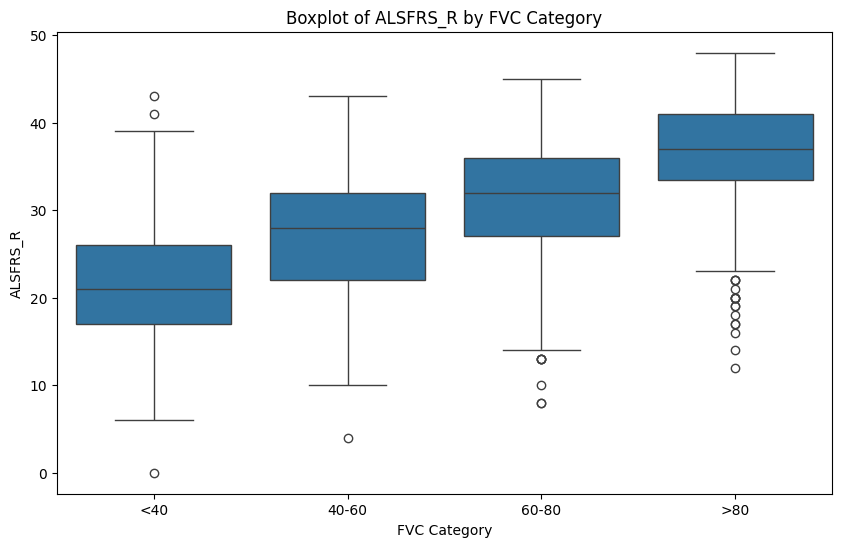

In [7]:
# Create a new column for FVC categories for plotting
df['FVC_Category'] = pd.Categorical(df['FVC'], categories=['<40', '40-60', '60-80', '>80'], ordered=True)

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='FVC_Category', y='ALSFRS_R')
plt.title('Boxplot of ALSFRS_R by FVC Category')
plt.xlabel('FVC Category')
plt.ylabel('ALSFRS_R')
plt.show()

In [8]:
# Calculate the mean of 'ALSFRS_R' for each FVC category (excluding 'ND')
fvc_category_means = df.groupby('FVC_Category')['ALSFRS_R'].mean()

# Display the calculated means
display(fvc_category_means)

/tmp/ipython-input-3663909878.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fvc_category_means = df.groupby('FVC_Category')['ALSFRS_R'].mean()


,ALSFRS_R
FVC_Category,
<40,21.592000
40-60,27.234637
60-80,31.004367
>80,36.573604


In [9]:
# Identify rows where FVC is 'ND'
nd_fvc_rows = df[df['FVC'] == 'ND']

# Display the first few rows with 'ND' in FVC
display(nd_fvc_rows.head())

,Patient_ID,Visit_ID,Date_of_birth,Symptom_onset_date,Diagnosis_date,Sex,Age_at_onset,Clinical_onset_type,Spirometry,FVC,...,PUMNS_Upper_Limb,PUMNS_Lower_Limb,PUMNS_Bulbar,CNS_Linear_Score,KINGS_Total,Disease_duration,Progression_rate,ALSFRS_R,ALSAQ_5,FVC_Category
2,1,3,1941-06-22,2018-10-01,2019-12-12,0,77.0,spinale,NaN,ND,...,1.0,3.0,2.0,7.0,4B,23.0,0.565217,35.0,25.0,NaN
4,1,5,1941-06-22,2018-10-01,2019-12-12,0,77.0,spinale,NaN,ND,...,1.0,4.0,0.0,7.0,4B,29.0,0.689655,28.0,50.0,NaN
8,1,9,1941-06-22,2018-10-01,2019-12-12,0,77.0,spinale,0.0,ND,...,0.0,0.0,0.0,7.0,4B,55.0,0.854545,1.0,35.0,NaN
21,3,4,1946-01-03,2020-12-01,2021-12-10,0,75.0,spinale,0.0,ND,...,0.0,0.0,0.0,7.0,4B,22.0,1.590909,13.0,80.0,NaN
22,3,5,1946-01-03,2020-12-01,2021-12-10,0,75.0,spinale,0.0,ND,...,0.0,0.0,0.0,7.0,4B,41.0,0.902439,11.0,85.0,NaN


In [10]:
import numpy as np

# Create a dictionary of the mean ALSFRS_R for each FVC category
mean_alsfrs_r_by_fvc = df.groupby('FVC_Category')['ALSFRS_R'].mean().to_dict()

# Remove the NaN category from the dictionary if it exists
if np.nan in mean_alsfrs_r_by_fvc:
    del mean_alsfrs_r_by_fvc[np.nan]

# Define a function to find the nearest FVC category based on ALSFRS_R
def find_nearest_fvc_category(alsfrs_r_value, means_dict):
    if pd.isna(alsfrs_r_value):
        return np.nan  # Cannot impute if ALSFRS_R is also NaN
    distances = {category: abs(alsfrs_r_value - mean_val) for category, mean_val in means_dict.items()}
    return min(distances, key=distances.get)

# Apply the function to the rows where FVC is 'ND' to get the imputed category
imputed_categories = nd_fvc_rows['ALSFRS_R'].apply(lambda x: find_nearest_fvc_category(x, mean_alsfrs_r_by_fvc))

# Update the 'FVC' column in the original DataFrame with the imputed values
df.loc[nd_fvc_rows.index, 'FVC'] = imputed_categories

# Update the 'FVC_Category' column based on the updated 'FVC' column
df['FVC_Category'] = pd.Categorical(df['FVC'].replace('ND', pd.NA), categories=['<40', '40-60', '60-80', '>80'], ordered=True)

# Display value counts for the FVC_Category column to verify imputation
display(df['FVC_Category'].value_counts(dropna=False))

/tmp/ipython-input-4190061216.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_alsfrs_r_by_fvc = df.groupby('FVC_Category')['ALSFRS_R'].mean().to_dict()


,count
FVC_Category,
>80,664
<40,311
60-80,243
40-60,194


In [11]:
df.columns

Index(['Patient_ID', 'Visit_ID', 'Date_of_birth', 'Symptom_onset_date',
       'Diagnosis_date', 'Sex', 'Age_at_onset', 'Clinical_onset_type',
       'Spirometry', 'FVC', 'Ventilation', 'Tracheostomy', 'PEG',
       'Family_history', 'Therapy', 'Diagnostic_delay', 'MRC_Upper_Limb',
       'MRC_Lower_Limb', 'MRC_Bulbar', 'PUMNS_Upper_Limb', 'PUMNS_Lower_Limb',
       'PUMNS_Bulbar', 'CNS_Linear_Score', 'KINGS_Total', 'Disease_duration',
       'Progression_rate', 'ALSFRS_R', 'ALSAQ_5', 'FVC_Category'],
      dtype='object')

In [12]:
# Replace the original 'FVC' column with the imputed 'FVC_Category'
df['FVC'] = df['FVC_Category']

# Drop the 'FVC_Category' column
df = df.drop('FVC_Category', axis=1)

# Display the first few rows to confirm the changes
display(df.head())

,Patient_ID,Visit_ID,Date_of_birth,Symptom_onset_date,Diagnosis_date,Sex,Age_at_onset,Clinical_onset_type,Spirometry,FVC,...,MRC_Bulbar,PUMNS_Upper_Limb,PUMNS_Lower_Limb,PUMNS_Bulbar,CNS_Linear_Score,KINGS_Total,Disease_duration,Progression_rate,ALSFRS_R,ALSAQ_5
0,1,1,1941-06-22,2018-10-01,2019-12-12,0,77.0,spinale,1.0,>80,...,11.0,4.0,4.0,0.0,7.0,3,14.0,0.785714,37.0,35.0
1,1,2,1941-06-22,2018-10-01,2019-12-12,0,77.0,spinale,1.0,60-80,...,13.0,0.0,6.0,0.0,7.0,4B,19.0,0.684211,35.0,30.0
2,1,3,1941-06-22,2018-10-01,2019-12-12,0,77.0,spinale,NaN,>80,...,12.0,1.0,3.0,2.0,7.0,4B,23.0,0.565217,35.0,25.0
3,1,4,1941-06-22,2018-10-01,2019-12-12,0,77.0,spinale,1.0,40-60,...,12.0,4.0,5.0,0.0,7.0,4B,26.0,0.538462,34.0,45.0
4,1,5,1941-06-22,2018-10-01,2019-12-12,0,77.0,spinale,NaN,40-60,...,11.0,1.0,4.0,0.0,7.0,4B,29.0,0.689655,28.0,50.0


In [13]:
# Check for remaining 'ND' values in the 'FVC' column
remaining_nd_fvc = df[df['FVC'] == 'ND']

# Display the rows with remaining 'ND' in FVC
display(remaining_nd_fvc)

,Patient_ID,Visit_ID,Date_of_birth,Symptom_onset_date,Diagnosis_date,Sex,Age_at_onset,Clinical_onset_type,Spirometry,FVC,...,MRC_Bulbar,PUMNS_Upper_Limb,PUMNS_Lower_Limb,PUMNS_Bulbar,CNS_Linear_Score,KINGS_Total,Disease_duration,Progression_rate,ALSFRS_R,ALSAQ_5


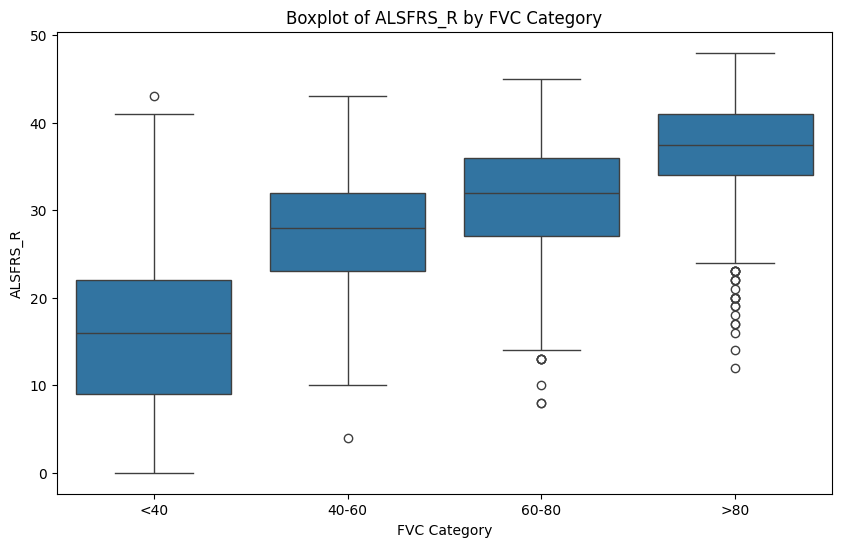

In [19]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='FVC', y='ALSFRS_R', order=['<40', '40-60', '60-80', '>80'])
plt.title('Boxplot of ALSFRS_R by FVC Category')
plt.xlabel('FVC Category')
plt.ylabel('ALSFRS_R')
plt.show()

#Spirometry

In [14]:
# Filter the DataFrame for rows where 'Spirometry' is NaN
spirometry_nan_rows = df[df['Spirometry'].isna()]

# Display the 'FVC' column for these rows
display(spirometry_nan_rows['FVC'])

,FVC
2,>80
4,40-60
36,<40
108,>80
165,>80
201,<40
265,>80
295,>80
297,60-80
326,60-80


In [15]:
# Filter the DataFrame for rows where FVC is '>80'
fvc_greater_than_80_df = df[df['FVC'] == '>80']

# Count the occurrences of each Spirometry value in the filtered DataFrame
spirometry_counts = fvc_greater_than_80_df['Spirometry'].value_counts(dropna=False)

# Display the counts
display(spirometry_counts)

,count
Spirometry,
1.0,591
0.0,61
NaN,12


In [16]:
# Filter the DataFrame for rows where FVC is '60-80'
fvc_60_80_df = df[df['FVC'] == '60-80']

# Count the occurrences of each Spirometry value in the filtered DataFrame
spirometry_counts = fvc_60_80_df['Spirometry'].value_counts(dropna=False)

# Display the counts
display(spirometry_counts)

,count
Spirometry,
1.0,229
0.0,11
NaN,3


In [17]:
# Filter the DataFrame for rows where FVC is '40-60'
fvc_40_60_df = df[df['FVC'] == '40-60']

# Count the occurrences of each Spirometry value in the filtered DataFrame
spirometry_counts = fvc_40_60_df['Spirometry'].value_counts(dropna=False)

# Display the counts
display(spirometry_counts)

,count
Spirometry,
1.0,179
0.0,13
NaN,2


In [18]:
# Filter the DataFrame for rows where FVC is '<40'
fvc_less_than_40_df = df[df['FVC'] == '<40']

# Count the occurrences of each Spirometry value in the filtered DataFrame
spirometry_counts = fvc_less_than_40_df['Spirometry'].value_counts(dropna=False)

# Display the counts
display(spirometry_counts)

,count
Spirometry,
0.0,178
1.0,125
NaN,8
